## 3d 目标检测 判断点云是否在bbox中
* 参考：https://blog.csdn.net/qq_35632833/article/details/106865648

https://www.yuque.com/huangzhongqing/ai_meeting/vn11kw#WWcAx


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection, LineCollection # 可视化
from scipy.spatial import Delaunay

lidar_file = "/home/hcq/huituo_server/data/kitti/training/velodyne/000000.bin" # 文件路径
pts = np.fromfile(lidar_file, dtype=np.float32).reshape(-1, 4)
# print("原始点：", pts)
print("原始点shape：",pts.shape)
# 判断 Test if points in `p` are in `hull`
def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0, hull.find_simplex(p) < 0

# 可视化
def plot_in_hull(p, hull):
    """
    plot relative to `in_hull` for 2d data
    """
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    # plot triangulation 可视化的第一张图
    poly = PolyCollection(hull.points[hull.vertices], facecolors='w', edgecolors='b') # 蓝色那条线
    plt.clf()
    plt.title('in hull') # 标题
    plt.gca().add_collection(poly)
    # plt.plot(hull.points[:,0], hull.points[:,1], 'o', hold=1)
    plt.plot(hull.points[:,0], hull.points[:,1], 'o')  


    # plot the convex hull
    edges = set()
    edge_points = []

    def add_edge(i, j):
        """Add a line between the i-th and j-th points, if not in the list already"""
        if (i, j) in edges or (j, i) in edges:
            # already added
            return
        edges.add( (i, j) )
        edge_points.append(hull.points[ [i, j] ])

    for ia, ib in hull.convex_hull:
        add_edge(ia, ib) # 凸包
    # 第1张图
    lines = LineCollection(edge_points, color='g') # 绿线
    plt.gca().add_collection(lines)
    plt.show()    


    # 第2张图
    # plot tested points `p` - black are inside hull, red outside  黑色内点，红色外点
    inside, out = in_hull(p,hull) # 将所有点分为内点和外点   
    plt.plot(p[inside,0],p[inside,1],'.k') # 黑色
    plt.plot(p[out,0],p[out,1],'.r') # 添加红色
    # plt.plot(p[-inside,0],p[-inside,1],'.r')
    plt.show()



原始点shape： (115384, 4)


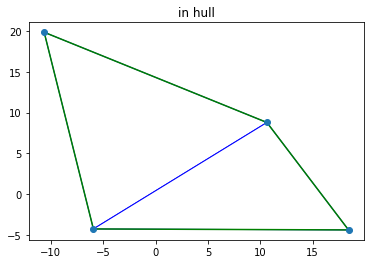

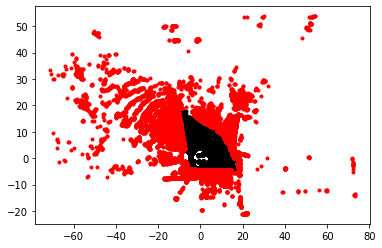

is_p_inside_points_hull True


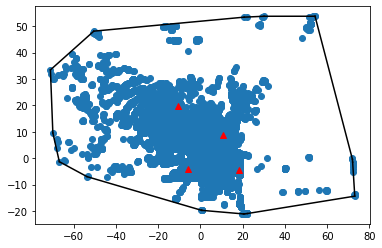

In [35]:
if __name__ == '__main__':
    
    p1 = pts[2000,0:2]
    p2 = pts[12782,0:2]
    p3 = pts[48772,0:2]
    p4 = pts[38217,0:2] # 四个(x,y )点

    p_in = np.vstack((p1, p2, p3, p4))
    plot_in_hull(pts[:,0:2], p_in)  # 可视化前面两个图


    # 方法 2 
    import pylab
    import numpy
    from scipy.spatial import ConvexHull

    def is_p_inside_points_hull(points, p):
        global hull, new_points # Remove this line! Just for plotting!
        hull = ConvexHull(points)
        new_points = numpy.append(points, p, axis=0) # 对待判定的每个点，逐一加入原有点集
        new_hull = ConvexHull(new_points) # 新的hull点
        if list(hull.vertices) == list(new_hull.vertices): # 判断新形成的凸包的边界点集是否有改变
            return True
        else:
            return False

    # Test:
    # points = numpy.random.rand(10, 2)   # 30 random points in 2-D
    # # Note: the number of points must be greater than the dimention.
    # p = numpy.random.rand(1, 2) # 1 random point in 2-D

    points = pts[:,0:2]
    p = np.vstack((p1, p2, p3, p4))

    print("is_p_inside_points_hull", is_p_inside_points_hull(points, p)) # 输出

    # Plot:可视化
    pylab.plot(points[:,0], points[:,1], 'o') # 所有点
    for simplex in hull.simplices:
        pylab.plot(points[simplex,0], points[simplex,1], 'k-')  # 所有点的边界线
    pylab.plot(p[:,0], p[:,1], '^r') # 那四个红点
    pylab.show()
